In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cancer_reg .csv', encoding='latin-1')
data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.shape

(3047, 33)

In [6]:
data.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,762.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,42.145323,51.773679,18.224450,35.002068,40.977034,6.158287,34.804660,13.282015,54.152642,7.852412,64.354939,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,5.292849,6.896928,8.093064,9.069722,11.115805,4.529059,7.034924,5.394756,8.315064,3.452371,10.647057,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,17.600000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,39.100000,47.750000,12.800000,29.200000,34.000000,3.100000,30.400000,9.400000,48.600000,5.500000,57.200000,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,42.400000,52.400000,17.100000,34.700000,40.400000,5.400000,35.300000,12.300000,54.500000,7.600000,65.100000,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,45.300000,56.400000,22.700000,40.700000,46.400000,8.200000,39.650000,16.100000,60.300000,9.700000,72.100000,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,65.700000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,42.200000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
avganncount                3047 non-null float64
avgdeathsperyear           3047 non-null int64
target_deathrate           3047 non-null float64
incidencerate              3047 non-null float64
medincome                  3047 non-null int64
popest2015                 3047 non-null int64
povertypercent             3047 non-null float64
studypercap                3047 non-null float64
binnedinc                  3047 non-null object
medianage                  3047 non-null float64
medianagemale              3047 non-null float64
medianagefemale            3047 non-null float64
geography                  3047 non-null object
percentmarried             3047 non-null float64
pctnohs18_24               3047 non-null float64
pcths18_24                 3047 non-null float64
pctsomecol18_24            762 non-null float64
pctbachdeg18_24            3047 non-null float64
pcths25_over        

In [8]:
data.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [9]:
sns.pairplot(data)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
corrmat = data.corr()
corrmat

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
avganncount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,-0.122844,-0.106108,-0.143327,-0.182054,0.109455,0.284176,-0.311375,0.321021,0.199459,-0.009016,0.132244,0.186045,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgdeathsperyear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,-0.144069,-0.181029,-0.136794,-0.151418,0.098464,0.259761,-0.295929,0.293210,0.125928,0.069701,0.056183,0.125820,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
target_deathrate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,0.012048,-0.266820,0.088463,0.261976,-0.188688,-0.287817,0.404589,-0.485477,-0.412046,0.378412,-0.386066,-0.363704,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidencerate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,-0.009106,-0.119524,-0.170762,0.022644,0.077666,0.046835,0.121725,-0.038177,0.004906,0.099979,0.105174,0.109278,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medincome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,-0.153278,0.355123,-0.289383,-0.190006,0.212953,0.492810,-0.471348,0.704928,0.693432,-0.453108,0.724175,0.788048,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popest2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,-0.177932,-0.160463,-0.126582,-0.151821,0.093202,0.248375,-0.311849,0.297463,0.140146,0.050768,0.052677,0.132660,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertypercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,-0.148164,-0.642857,0.288106,0.094211,-0.162099,-0.387122,0.194361,-0.531600,-0.736767,0.655148,-0.822534,-0.761672,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studypercap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,-0.030577,-0.038143,-0.090387,-0.057035,0.101220,0.063819,-0.085128,0.108594,0.088021,-0.031957,0.092545,0.072381,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
medianage,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,0.124678,0.046372,0.006178,0.050574,-0.018325,-0.016909,0.036587,-0.020352,-0.024650,0.018590,0.004665,-0.024272,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
medianagemale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,0.933696,0.449986,0.100486,0.241310,-0.274801,-0.034135,0.318277,-0.131599,-0.165199,-0.142737,0.082232,-0.167064,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


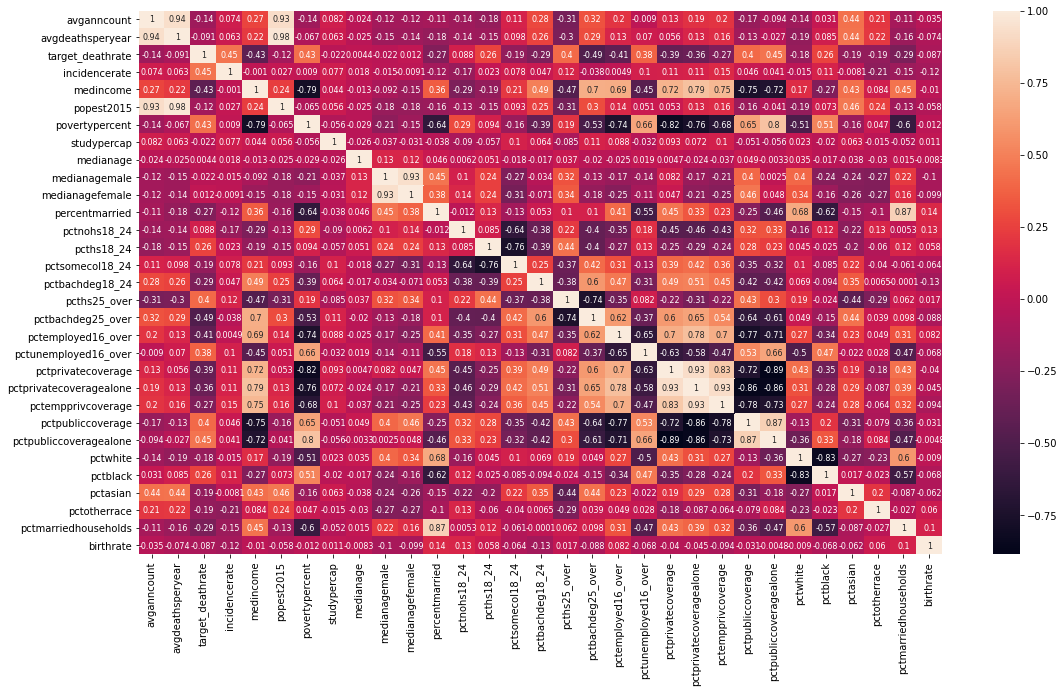

In [11]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, annot=True, annot_kws={'size': 8})

In [12]:
corrmat.index.values

array(['avganncount', 'avgdeathsperyear', 'target_deathrate',
       'incidencerate', 'medincome', 'popest2015', 'povertypercent',
       'studypercap', 'medianage', 'medianagemale', 'medianagefemale',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite',
       'pctblack', 'pctasian', 'pctotherrace', 'pctmarriedhouseholds',
       'birthrate'], dtype=object)

In [0]:
def get_Correlated_Feature(corrdata, threshold):
  feature = []
  value =[]

  for i, index in enumerate(corrdata.index):
    if abs(corrdata[index] > threshold):
      feature.append(index)
      value.append(corrdata[index])

  df = pd.DataFrame(data=value, index=feature, columns=['Corr Value'])
  return df

In [14]:
threshold = 0.30
corr_value = get_Correlated_Feature(corrmat['target_deathrate'], threshold)
corr_value

,Corr Value
target_deathrate,1.000000
incidencerate,0.449432
povertypercent,0.429389
pcths25_over,0.404589
pctunemployed16_over,0.378412
pctpubliccoverage,0.404572
pctpubliccoveragealone,0.449358


In [15]:
corr_value.index.values

array(['target_deathrate', 'incidencerate', 'povertypercent',
       'pcths25_over', 'pctunemployed16_over', 'pctpubliccoverage',
       'pctpubliccoveragealone'], dtype=object)

In [16]:
corr_data = data[corr_value.index]
corr_data.head()

,target_deathrate,incidencerate,povertypercent,pcths25_over,pctunemployed16_over,pctpubliccoverage,pctpubliccoveragealone
0,164.9,489.8,11.2,23.2,8.0,32.9,14.0
1,161.3,411.6,18.6,26.0,7.8,31.1,15.3
2,174.7,349.7,14.6,29.0,7.0,42.1,21.1
3,194.8,430.4,17.1,31.6,12.1,45.3,25.0
4,144.4,350.1,12.5,33.4,4.8,44.0,22.7


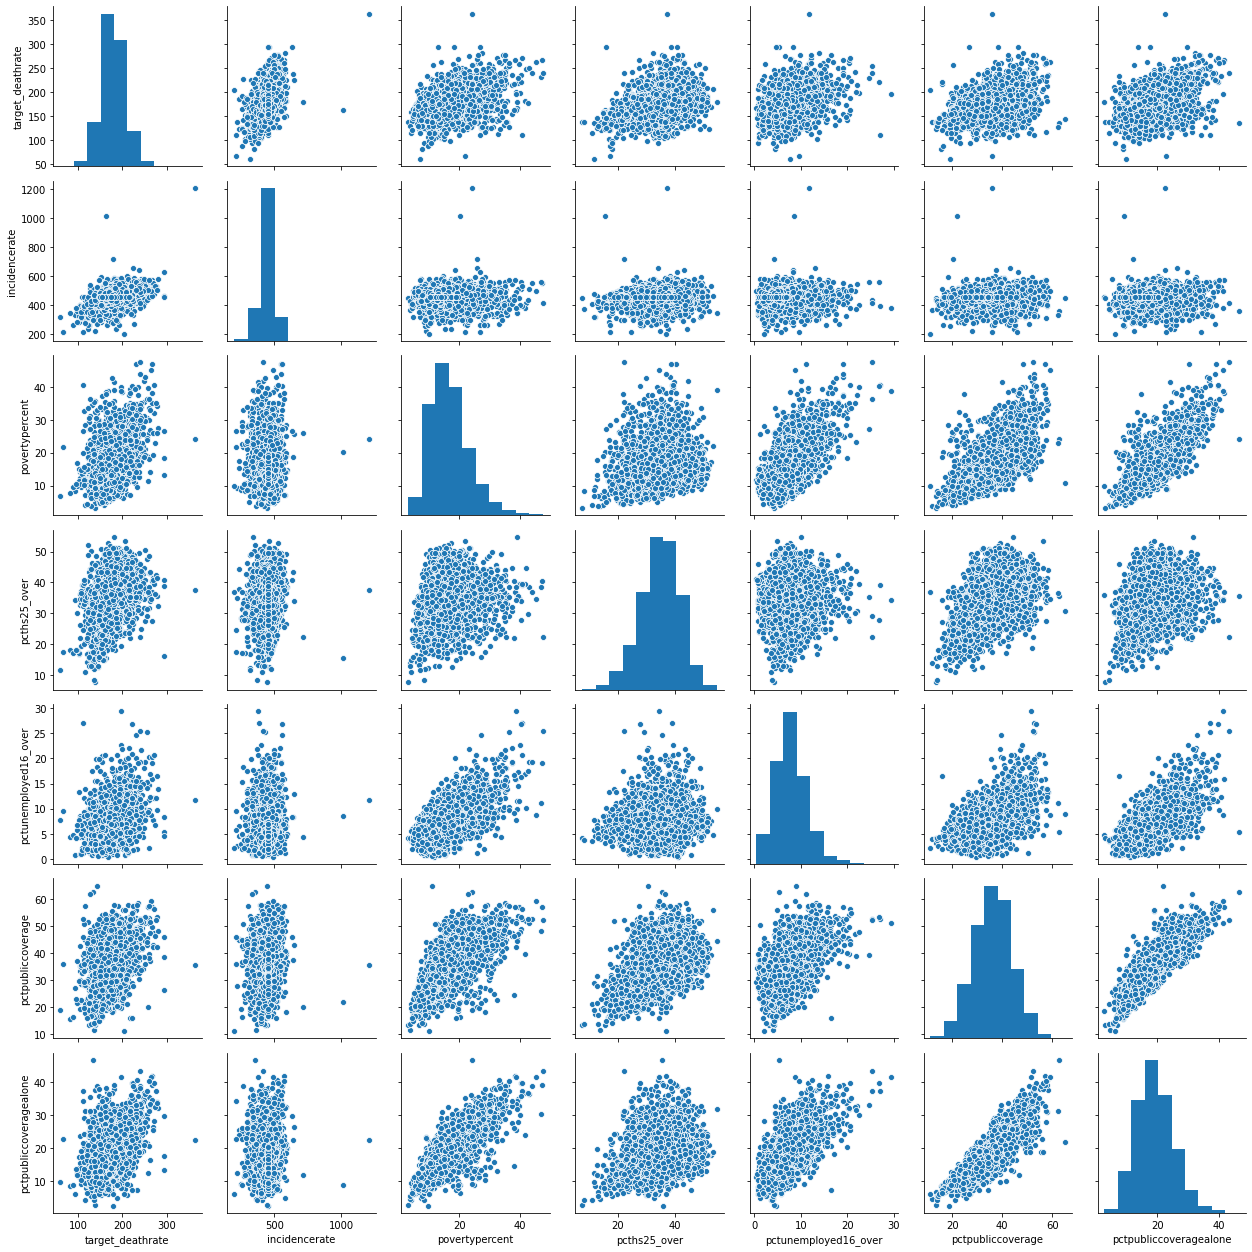

In [17]:
sns.pairplot(corr_data)
plt.tight_layout()

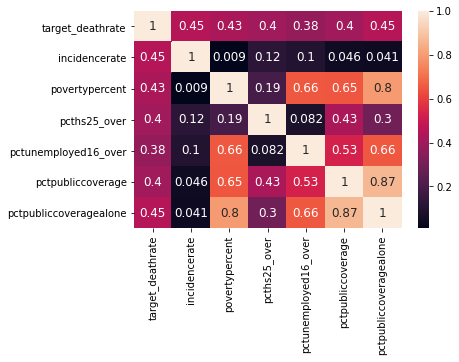

In [18]:
sns.heatmap(corr_data.corr(), annot=True, annot_kws={'size': 12})

In [19]:
X = corr_data.drop(labels=['target_deathrate'], axis = 1)
y = corr_data['target_deathrate']
X.head()

,incidencerate,povertypercent,pcths25_over,pctunemployed16_over,pctpubliccoverage,pctpubliccoveragealone
0,489.8,11.2,23.2,8.0,32.9,14.0
1,411.6,18.6,26.0,7.8,31.1,15.3
2,349.7,14.6,29.0,7.0,42.1,21.1
3,430.4,17.1,31.6,12.1,45.3,25.0
4,350.1,12.5,33.4,4.8,44.0,22.7


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((2437, 6), (610, 6))

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predict = model.predict(X_test)

In [23]:
df = pd.DataFrame(data = [y_predict, y_test])
df.T

,0,1
0,153.261603,140.0
1,194.134662,184.6
2,206.885025,193.6
3,186.821707,192.2
4,209.755531,225.7
...,...,...
605,155.253984,182.0
606,169.215682,180.2
607,161.060222,159.6
608,202.816834,215.6


In [0]:
from sklearn.metrics import r2_score

In [25]:
corr_data.columns

Index(['target_deathrate', 'incidencerate', 'povertypercent', 'pcths25_over',
       'pctunemployed16_over', 'pctpubliccoverage', 'pctpubliccoveragealone'],
      dtype='object')

In [26]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.517000471665271
mae:  14.796102016225683
mse:  381.0741807856172


In [0]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [0]:
def performance_metrics(features, th, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe = pd.DataFrame(data= [total_features_name, total_features, selected_correlation_value, r2_scores, mae_value, mse_value],
                                    index = ['features name', '#feature', 'corr_value', 'r2_score', 'MAE', 'MSE'])
    return metrics_dataframe.T

In [29]:
performance_metrics(corr_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['target_deathrate' 'incidencerate' 'povertype...,6,0.3,0.517,14.7961,381.074


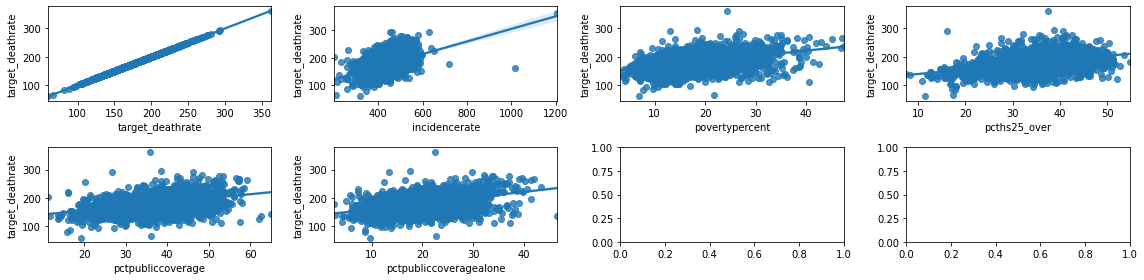

In [43]:
rows = 2
cols = 4
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (16, 4))

col = corr_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = corr_data[col[index]], y = corr_data['target_deathrate'], ax = ax[i][j])
        index = index + 1
        if index > len(corr_data.columns) - 1:
          break
fig.tight_layout()

In [31]:
corrmat['target_deathrate']

avganncount               -0.143532
avgdeathsperyear          -0.090715
target_deathrate           1.000000
incidencerate              0.449432
medincome                 -0.428615
popest2015                -0.120073
povertypercent             0.429389
studypercap               -0.022285
medianage                  0.004375
medianagemale             -0.021929
medianagefemale            0.012048
percentmarried            -0.266820
pctnohs18_24               0.088463
pcths18_24                 0.261976
pctsomecol18_24           -0.188688
pctbachdeg18_24           -0.287817
pcths25_over               0.404589
pctbachdeg25_over         -0.485477
pctemployed16_over        -0.412046
pctunemployed16_over       0.378412
pctprivatecoverage        -0.386066
pctprivatecoveragealone   -0.363704
pctempprivcoverage        -0.267399
pctpubliccoverage          0.404572
pctpubliccoveragealone     0.449358
pctwhite                  -0.177400
pctblack                   0.257024
pctasian                  -0

In [32]:
threshold = 0.40
corr_value = get_Correlated_Feature(corrmat['target_deathrate'], threshold)
corr_value

,Corr Value
target_deathrate,1.000000
incidencerate,0.449432
povertypercent,0.429389
pcths25_over,0.404589
pctpubliccoverage,0.404572
pctpubliccoveragealone,0.449358


In [33]:
corr_data = data[corr_value.index]
corr_data.head()

,target_deathrate,incidencerate,povertypercent,pcths25_over,pctpubliccoverage,pctpubliccoveragealone
0,164.9,489.8,11.2,23.2,32.9,14.0
1,161.3,411.6,18.6,26.0,31.1,15.3
2,174.7,349.7,14.6,29.0,42.1,21.1
3,194.8,430.4,17.1,31.6,45.3,25.0
4,144.4,350.1,12.5,33.4,44.0,22.7


In [0]:
def get_y_predict(corr_data):
    X = corr_data.drop(labels = ['target_deathrate'], axis = 1)
    y = corr_data['target_deathrate']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return y_predict

In [0]:
y_predict = get_y_predict(corr_data)

In [36]:
performance_metrics(corr_data.columns.values, threshold, y_test, y_predict)

,features name,#feature,corr_value,r2_score,MAE,MSE
0,['target_deathrate' 'incidencerate' 'povertype...,6,0.3,0.517,14.7961,381.074
1,['target_deathrate' 'incidencerate' 'povertype...,5,0.4,0.510361,14.9293,386.312


In [0]:
from sklearn.model_selection import learning_curve, ShuffleSplit

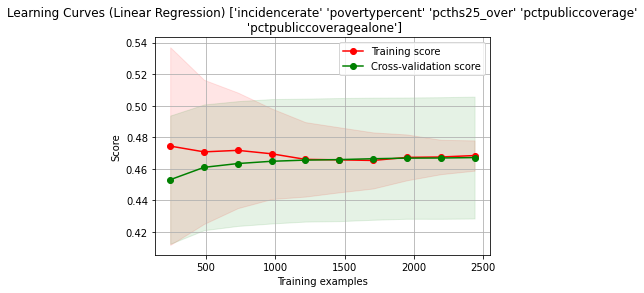

In [40]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X = corr_data.drop(labels = ['target_deathrate'], axis = 1)
y = corr_data['target_deathrate']

title = "Learning Curves (Linear Regression) " + str(X.columns.values)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

plt.show()